<a href="https://colab.research.google.com/github/taismatozo/Projeto-Final-ShePY/blob/main/Projeto_final_ShePY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Projeto Final ShePY**
##ANÁLISE DE DADOS DE REAL TIME PCR (RT-PCR) UTILIZANDO PYTHON

Células são as unidades que formam todos os seres vivos. Existem milhares de tipos de células diferentes e essa diferença se dá principalmente pelas proteínas que a células tem. Essas proteínas são determinadas a partir do genoma da célula, ou seja, do DNA. 

A partir do DNA são transcritos os RNAs, que são mensageiros que levam a informação do DNA até os ribossomos, que fazem a tradução desse RNA em proteínas.

O RT-PCR mede o quanto do RNA de um gene específico nós temos na célula. Isso o torna uma ferramenta poderosa em toda a área de ciências da saúde. 
Utilizando o RT-PCR é possivel verificar nível de infecção de células ou tecidos (COVID-19, HIV) verificar a expressão de genes associados ao câncer ou ainda determinar um tipo celular.

Infelizmente, o processo de análise do RT-PCR é um pouco trabalhoso visto que os dados são gerados em excel e que mais de uma análise é necessária.

###**Importando dados do excel para o python**
Utilizei a lib pandas para que possamos importar os dados gerados do RT-PCR.
Além disso, também retirei as partes da tabela que não me interessavam

In [1]:
import pandas as pd

In [2]:
pcr = pd.read_excel('170614.xls', 'Results', 
                    skiprows = 42, #retirar linhas de cima
                    skipfooter = 5) #retirar linhas de baixo
pcr.head(5)


,Well,Well Position,Omit,Sample Name,Target Name,Task,Reporter,Quencher,Quantity,Quantity Mean,Quantity SD,RQ,RQ Min,RQ Max,CT,Ct Mean,Ct SD,Delta Ct,Delta Ct Mean,Delta Ct SD,Delta Ct SE,Delta Delta Ct,Automatic Ct Threshold,Ct Threshold,Automatic Baseline,Baseline Start,Baseline End,Amp Status,Comments,Cq Conf,EXPFAIL,PRFLOW,NOAMP,CQCONF,HIGHSD
0,7,A7,False,DC NT,B2M,UNKNOWN,FAM,NFQ-MGB,NaN,NaN,NaN,NaN,NaN,NaN,15.5444,15.588983,0.063083,NaN,NaN,NaN,NaN,NaN,True,0.133525,True,3,10,Amp,NaN,0.996533,N,N,N,N,N
1,8,A8,False,DC NT,B2M,UNKNOWN,FAM,NFQ-MGB,NaN,NaN,NaN,NaN,NaN,NaN,15.6336,15.588983,0.063083,NaN,NaN,NaN,NaN,NaN,True,0.133525,True,3,11,Amp,NaN,0.995035,N,N,N,N,N
2,9,A9,False,DC MYO1G #1,MYO1G,UNKNOWN,FAM,NFQ-MGB,NaN,NaN,NaN,1.0,0.914308,1.093724,26.2701,26.273643,0.004959,NaN,10.354709,0.070256,0.040613,0.0,True,0.485556,True,3,20,Amp,NaN,0.982936,N,N,N,N,N
3,10,A10,False,DC MYO1G #1,MYO1G,UNKNOWN,FAM,NFQ-MGB,NaN,NaN,NaN,1.0,0.914308,1.093724,26.2772,26.273643,0.004959,NaN,10.354709,0.070256,0.040613,0.0,True,0.485556,True,3,19,Amp,NaN,0.983164,N,N,N,N,N
4,11,A11,False,JURKAT MYO9B #3,HPRT,UNKNOWN,FAM,NFQ-MGB,NaN,NaN,NaN,NaN,NaN,NaN,24.8637,24.589966,0.387144,NaN,NaN,NaN,NaN,NaN,True,0.364427,True,3,19,Amp,NaN,0.982433,N,N,N,N,N


In [3]:
pcr.tail()

,Well,Well Position,Omit,Sample Name,Target Name,Task,Reporter,Quencher,Quantity,Quantity Mean,Quantity SD,RQ,RQ Min,RQ Max,CT,Ct Mean,Ct SD,Delta Ct,Delta Ct Mean,Delta Ct SD,Delta Ct SE,Delta Delta Ct,Automatic Ct Threshold,Ct Threshold,Automatic Baseline,Baseline Start,Baseline End,Amp Status,Comments,Cq Conf,EXPFAIL,PRFLOW,NOAMP,CQCONF,HIGHSD
41,91,H7,False,DC MYO1G #1,RSAD-2,UNKNOWN,FAM,NFQ-MGB,NaN,NaN,NaN,1.0,0.894216,1.118299,28.8114,28.841965,0.043173,NaN,12.923028,0.082312,0.050686,0.0,True,0.468925,True,3,21,Amp,NaN,0.984012,N,N,N,N,N
42,92,H8,False,DC MYO1G #1,RSAD-2,UNKNOWN,FAM,NFQ-MGB,NaN,NaN,NaN,1.0,0.894216,1.118299,28.8725,28.841965,0.043173,NaN,12.923028,0.082312,0.050686,0.0,True,0.468925,True,3,23,Amp,NaN,0.977137,N,N,N,N,N
43,93,H9,False,JURKAT SCR,MYO9B,UNKNOWN,FAM,NFQ-MGB,NaN,NaN,NaN,NaN,NaN,NaN,23.4656,23.279995,0.262516,NaN,NaN,NaN,NaN,NaN,True,0.370627,True,3,17,Amp,NaN,0.981150,N,N,N,N,N
44,94,H10,False,JURKAT SCR,MYO9B,UNKNOWN,FAM,NFQ-MGB,NaN,NaN,NaN,NaN,NaN,NaN,23.0944,23.279995,0.262516,NaN,NaN,NaN,NaN,NaN,True,0.370627,True,3,17,Amp,NaN,0.986536,N,N,N,N,N
45,95,H11,False,H2O,HPRT,UNKNOWN,FAM,NFQ-MGB,NaN,NaN,NaN,NaN,NaN,NaN,Undetermined,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,0.364427,True,3,28,No Amp,NaN,0.000000,N,Y,N,Y,N


In [4]:
pcr.shape

(46, 35)

In [5]:
#Retirei também as colunas que não são úteis em minha análise
pcr_clean = pcr.iloc[:,[3, 4, 14, 15,16]]
pcr_clean.head(3)

,Sample Name,Target Name,CT,Ct Mean,Ct SD
0,DC NT,B2M,15.5444,15.588983,0.063083
1,DC NT,B2M,15.6336,15.588983,0.063083
2,DC MYO1G #1,MYO1G,26.2701,26.273643,0.004959


In [6]:
pcr_clean.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sample Name  46 non-null     object 
 1   Target Name  46 non-null     object 
 2   CT           46 non-null     object 
 3   Ct Mean      42 non-null     float64
 4   Ct SD        41 non-null     float64
dtypes: float64(2), object(3)
memory usage: 1.9+ KB


In [7]:
pcr_clean['CT'] = pd.to_numeric(pcr_clean['CT'], errors='coerce')
#vi que uma das colunas que era númerica estava com object e não como float, então utilizei o código acima para consertar isso e não ter problema na hora de montar o gráfico

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [8]:
pcr_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sample Name  46 non-null     object 
 1   Target Name  46 non-null     object 
 2   CT           42 non-null     float64
 3   Ct Mean      42 non-null     float64
 4   Ct SD        41 non-null     float64
dtypes: float64(3), object(2)
memory usage: 1.9+ KB


#Análisando as duplicatas do experimento 
Para ter certeza de que as duplicatas presentes no experimento estão parecidas, plotei um gráfico de barras contendo todas as minhas amostras e pedi que o sns colocasse também uma barra de desvio (sd). Assim consigo saber se houve algum erro na hora da execução do experimento.

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

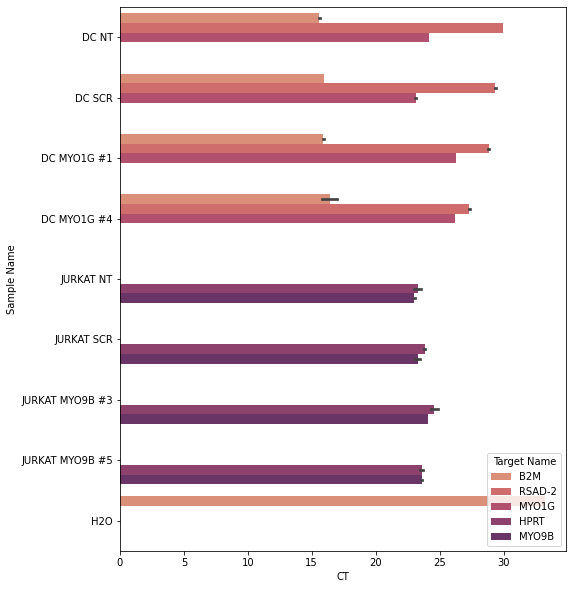

In [61]:
plt.figure(figsize=(8, 10))
sns.barplot(x="CT", y="Sample Name", hue= 'Target Name', 
            hue_order= ['B2M', 'RSAD-2', 'MYO1G', 'HPRT', 'MYO9B'],
            order= ['DC NT', 'DC SCR', 'DC MYO1G #1', 'DC MYO1G #4', 'JURKAT NT','JURKAT SCR', 'JURKAT MYO9B #3','JURKAT MYO9B #5', 'H2O'],
            orient= 'h',
            ci = 'sd', 
            palette = 'flare', 
            data=pcr_clean)

#Análisando os genes 'Housekeeping'
Genes housekeeping são genes que são expressos geralmente mais ou menos na mesma quantidade independente do tratamento feito na célula. Nós utilizamos genes housekeeping para comparar à expressão do seu gene de interesse.

Por isso, plotei boxplot, assim é possível ver se há algum 'outlier' onde a expressão do housekeeping não correspondeu ao esperado.

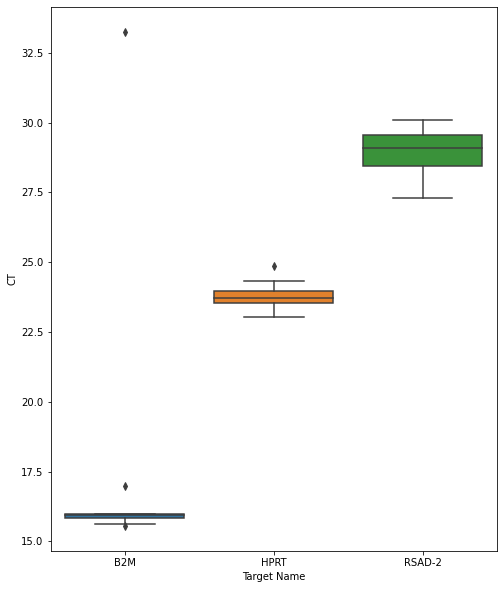

In [11]:
plt.figure(figsize=(8, 10))
sns.boxplot(x= 'Target Name' , y= 'CT' , data= pcr_clean,
            order= ['B2M', 'HPRT', 'RSAD-2'])

#Análisando a expressão gênica de DCs (Células dendríticas)
Para analisar de fato a expressão gênica de uma proteína, utilizamos a seguinte equação: 2^-(CT gene de interesse - CT do gene housekeeping). 

A forma mais fácil que encontrei de realizar essa análise, foi atribuindo uma váriavel para o CT de cada amostra. 

Tentei fazer isso de diversos modos, mas o único que funcionou foi encontrando a amostra de interesse com o .loc. Para isso precisei encontrar a linha em questão que continha o dados que seria atribuido a variável. 
Então usei o loc para encontrar em qual linha estavam minhas amostras especificas, dentro do meu conjunto de dados e o loc novamente para dizer que eu queria que ele selecionasse os dados da coluna ct mean da linha específica.

Nessas amostras, analisei a expressão de myo1g em células que foram tratadas ou não com shRNA que diminui a expressão da proteína.
Também analisei a expressão do RSAD2, um gene que é expresso em células ativadas para verificar se as células se ativavam com o tratamento com shRNA



In [12]:
pcr_clean.loc[pcr_clean['Sample Name'] == 'DC SCR']

,Sample Name,Target Name,CT,Ct Mean,Ct SD
18,DC SCR,B2M,15.970570,15.962788,0.011005
19,DC SCR,B2M,15.955006,15.962788,0.011005
24,DC SCR,RSAD-2,29.402208,29.357363,0.063421
25,DC SCR,RSAD-2,29.312517,29.357363,0.063421
30,DC SCR,MYO1G,23.081709,23.126360,0.063146
31,DC SCR,MYO1G,23.171011,23.126360,0.063146


In [13]:
DC_SCR_B2M = pcr_clean.loc[18,'Ct Mean']
DC_SCR_RSAD = pcr_clean.loc[24,'Ct Mean']
DC_SCR_1g = pcr_clean.loc[30,'Ct Mean']

In [14]:
pcr_clean.loc[pcr_clean['Sample Name'] == 'DC NT']

,Sample Name,Target Name,CT,Ct Mean,Ct SD
0,DC NT,B2M,15.544376,15.588983,0.063083
1,DC NT,B2M,15.633589,15.588983,0.063083
7,DC NT,RSAD-2,29.997395,30.053547,0.079411
12,DC NT,MYO1G,24.180719,24.184471,0.005306
13,DC NT,MYO1G,24.188223,24.184471,0.005306


In [15]:
DC_NT_B2M = pcr_clean.loc[0,'Ct Mean']
DC_NT_RSAD = pcr_clean.loc[7,'Ct Mean']
DC_NT_1g = pcr_clean.loc[13,'Ct Mean']

In [16]:
pcr_clean.loc[pcr_clean['Sample Name'] == 'DC MYO1G #1']

,Sample Name,Target Name,CT,Ct Mean,Ct SD
2,DC MYO1G #1,MYO1G,26.270138,26.273643,0.004959
3,DC MYO1G #1,MYO1G,26.277151,26.273643,0.004959
35,DC MYO1G #1,B2M,15.990346,15.918935,0.070081
36,DC MYO1G #1,B2M,15.850265,15.918935,0.070081
37,DC MYO1G #1,B2M,15.916197,15.918935,0.070081
41,DC MYO1G #1,RSAD-2,28.811436,28.841965,0.043173
42,DC MYO1G #1,RSAD-2,28.872492,28.841965,0.043173


In [17]:
DC_1g1_B2M = pcr_clean.loc[35,'Ct Mean']
DC_1g1_RSAD = pcr_clean.loc[41,'Ct Mean']
DC_1g1_1g = pcr_clean.loc[2,'Ct Mean']

In [18]:
pcr_clean.loc[pcr_clean['Sample Name'] == 'DC MYO1G #4']

,Sample Name,Target Name,CT,Ct Mean,Ct SD
8,DC MYO1G #4,B2M,15.836969,16.400246,0.796594
9,DC MYO1G #4,B2M,16.963524,16.400246,0.796594
14,DC MYO1G #4,RSAD-2,27.345530,27.318592,0.038095
15,DC MYO1G #4,RSAD-2,27.291655,27.318592,0.038095
20,DC MYO1G #4,MYO1G,26.219694,26.219978,0.000401
21,DC MYO1G #4,MYO1G,26.220261,26.219978,0.000401


In [19]:
DC_1g4_B2M = pcr_clean.loc[8,'Ct Mean']
DC_1g4_RSAD = pcr_clean.loc[14,'Ct Mean']
DC_1g4_1g = pcr_clean.loc[20,'Ct Mean']

Após atribuir as váriaveis, resolvi criar um novo conjunto de dados para facilitar minha análise. 
Então plotei os dados como um dicionário e criei o dataframe com o pandas 


In [23]:
dct = {'Sample':['NT', 'SCR', "1G #1", '1G #4'], 
       'HK':[DC_NT_B2M, DC_SCR_B2M, DC_1g1_B2M, DC_1g4_B2M], #CT do gene housekeepinh
       'myo1g':[DC_NT_1g, DC_SCR_1g, DC_1g1_1g, DC_1g4_1g], #CT da myo1g (um dos genes de interesse)
       'RSAD2':[DC_NT_RSAD, DC_SCR_RSAD, DC_1g1_1g, DC_1g4_RSAD], #CT do RSAD2 (Também um gene de interesse)
       'DCT 1g': [2**-(DC_NT_1g - DC_NT_B2M), #Fórmula utilizada para saber o quanto um gene é expresso baseado na expressão do housekeeping
               2**-(DC_SCR_1g - DC_SCR_B2M),
               2**-(DC_1g1_1g-DC_1g1_B2M),
               2**-(DC_1g4_1g-DC_1g4_B2M)],
        'DCT RSAD-2':  [2**-(DC_NT_RSAD - DC_NT_B2M),  #Fórmula utilizada para saber o quanto um gene é expresso baseado na expressão do housekeeping
               2**-(DC_SCR_RSAD - DC_SCR_B2M),
               2**-(DC_1g1_RSAD - DC_1g1_B2M),
               2**-(DC_1g4_RSAD - DC_1g4_B2M)]}
DCT= pd.DataFrame(dct)
DCT

,Sample,HK,myo1g,RSAD2,DCT 1g,DCT RSAD-2
0,NT,15.588983,24.184471,30.053547,0.002585,0.000044
1,SCR,15.962788,23.126360,29.357363,0.006975,0.000093
2,1G #1,15.918935,26.273643,26.273643,0.000764,0.000129
3,1G #4,16.400246,26.219978,27.318592,0.001107,0.000517


In [21]:
DCT.info() #vi as infos do df para saber se as tabelas que continham números estavam como float

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Sample      4 non-null      object 
 1   HK          4 non-null      float64
 2   myo1g       4 non-null      float64
 3   RSAD2       4 non-null      float64
 4   DCT 1g      4 non-null      float64
 5   DCT RSAD-2  4 non-null      float64
dtypes: float64(5), object(1)
memory usage: 320.0+ bytes


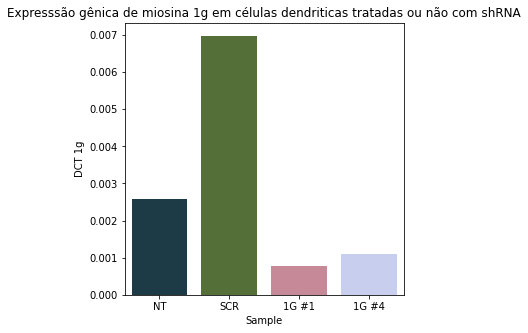

In [25]:
plt.figure(figsize=(5,5))
plt.title('Expresssão gênica de miosina 1g em células dendriticas tratadas ou não com shRNA')
sns.barplot(x="Sample", y="DCT 1g", 
            palette = 'cubehelix', 
            data= DCT)

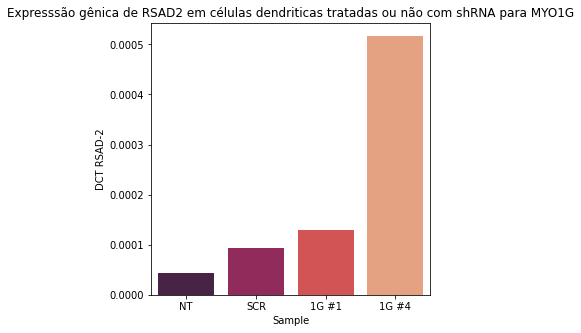

In [29]:
plt.figure(figsize=(5,5))
plt.title('Expresssão gênica de RSAD2 em células dendriticas tratadas ou não com shRNA para MYO1G')
sns.barplot(x="Sample", y="DCT RSAD-2", 
            palette = 'rocket', 
            data= DCT)

##Análisando expressão gênica de células Jurkat 
Utilizei a mesma lógica para analisar as células Jurkat. 
No entanto dessa vez olhei a expressão de outra proteína, a miosina 9b.

In [40]:
pcr_clean.loc[pcr_clean['Sample Name'] == 'JURKAT NT']

,Sample Name,Target Name,CT,Ct Mean,Ct SD
26,JURKAT NT,HPRT,23.020020,23.276649,0.362931
27,JURKAT NT,HPRT,23.533281,23.276649,0.362931
32,JURKAT NT,MYO9B,23.072945,23.034916,0.053779
33,JURKAT NT,MYO9B,22.996889,23.034916,0.053779


In [41]:
jkt_NT_HPRT = pcr_clean.loc[26,'Ct Mean']
jkt_NT_9b = pcr_clean.loc[32,'Ct Mean']

In [32]:
pcr_clean.loc[pcr_clean['Sample Name'] == 'JURKAT SCR']

,Sample Name,Target Name,CT,Ct Mean,Ct SD
38,JURKAT SCR,HPRT,23.783489,23.822746,0.055518
39,JURKAT SCR,HPRT,23.862003,23.822746,0.055518
43,JURKAT SCR,MYO9B,23.465622,23.279995,0.262516
44,JURKAT SCR,MYO9B,23.094368,23.279995,0.262516


In [48]:
jkt_SCR_HPRT = pcr_clean.loc[38,'Ct Mean']
jkt_SCR_9b = pcr_clean.loc[43,'Ct Mean']

In [49]:
pcr_clean.loc[pcr_clean['Sample Name'] == 'JURKAT MYO9B #3']

,Sample Name,Target Name,CT,Ct Mean,Ct SD
4,JURKAT MYO9B #3,HPRT,24.863718,24.589966,0.387144
5,JURKAT MYO9B #3,HPRT,24.316214,24.589966,0.387144
10,JURKAT MYO9B #3,MYO9B,24.121443,24.102352,0.027000
11,JURKAT MYO9B #3,MYO9B,24.083260,24.102352,0.027000


In [50]:
jkt_9b3_HPRT = pcr_clean.loc[4,'Ct Mean']
jkt_9b3_9b = pcr_clean.loc[10,'Ct Mean']

In [51]:
pcr_clean.loc[pcr_clean['Sample Name'] == 'JURKAT MYO9B #5']

,Sample Name,Target Name,CT,Ct Mean,Ct SD
16,JURKAT MYO9B #5,HPRT,23.675720,23.590132,0.121040
17,JURKAT MYO9B #5,HPRT,23.504543,23.590132,0.121040
22,JURKAT MYO9B #5,MYO9B,23.653282,23.608627,0.063151
23,JURKAT MYO9B #5,MYO9B,23.563972,23.608627,0.063151


In [52]:
jkt_9b5_HPRT = pcr_clean.loc[16,'Ct Mean']
jkt_9b5_9b = pcr_clean.loc[22,'Ct Mean']

In [56]:
dctjkt = {'Sample':['NT', 'SCR', "9B #3", '9B #5'], 
       'HK':[jkt_NT_HPRT, jkt_SCR_HPRT, jkt_9b3_HPRT, jkt_9b5_HPRT], #CT do gene housekeeping
       'myo9b':[jkt_NT_9b, jkt_SCR_9b, jkt_9b3_9b, jkt_9b5_9b], #CT da myo1g (um dos genes de interesse)
       'DCT 9b': [2**-(jkt_NT_9b - jkt_NT_HPRT), #Fórmula utilizada para saber o quanto um gene é expresso baseado na expressão do housekeeping
               2**-(jkt_SCR_9b - jkt_SCR_HPRT),
               2**-(jkt_9b3_9b - jkt_9b3_HPRT),
               2**-(jkt_9b5_9b - jkt_9b5_HPRT)]}
dctjkt= pd.DataFrame(dctjkt)
dctjkt

,Sample,HK,myo9b,DCT 9b
0,NT,23.276649,23.034916,1.182413
1,SCR,23.822746,23.279995,1.456748
2,9B #3,24.589966,24.102352,1.402124
3,9B #5,23.590132,23.608627,0.987262


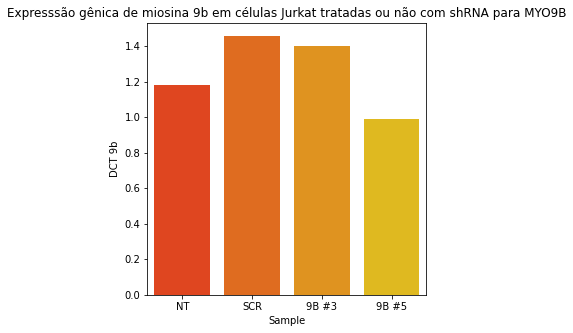

In [59]:
plt.figure(figsize=(5,5))
plt.title('Expresssão gênica de miosina 9b em células Jurkat tratadas ou não com shRNA para MYO9B')
sns.barplot(x="Sample", y="DCT 9b", 
            palette = 'autumn', 
            data= dctjkt)

#Conclusões
Os shRNAs usados em Células Dendriticas para silenciar a myosina 1g funcionaram bem, porém, provocaram ativação células como é possível observar com o aumento da expressão de RSAD-2. 
Os shRNAs utilizados nas células Jurkat não funcionaram, visto que a expressão da miosina 9b continuou a mesma ou reduziu muito pouco.